# Predicting Titanic Survivors

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots


In [260]:
import warnings

warnings.filterwarnings('ignore')

## Read csv files

In [261]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


## Description of data

- Survived: indicates the death or survival of the passenger for learning. This is the vector to predict for the test. The result is Boolean: 1 for "survival", 0 for "death".
- Pclass: the class of the rooms of the ship, on 3 levels: 1 being the best, 3 the "eco" class and 2 the intermediate. It is therefore a categorical variable, but one which could be considered as ordered.
- Name: the name of the person, therefore categorical variable.
- Sex: the sex of the passenger. It is a categorical variable with 2 modalities: "Male" and "Female".
- Age: the age of the passenger, a continuous variable with missing values.
- SisbSp (Sibling and Spouse): the number of family members of the passenger of type brother, sister, half-brother, half-sister, husband, wife (a continuous variable).
- Parch (Parent and Child): the number of family members of the passenger such as father, mother, son, daughter, stepson, stepdaughter (also a continuous variable).
- Ticket: the ticket number, a categorical variable.
- Fare: the price of the ticket, a continuous variable.
- Cabin: the cabin number, a categorical variable with a large number of missing values.
- Embarked: the passenger's embarkation port, a categorical variable with 3 modalities: "C" (Cherbourg), "Q" (Queenstown) and "S" (Southampton).

## Read csv files

In [262]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Shape of train file

In [263]:
train.shape

(891, 12)

There are 891 rows and 12 columns

### Information of file train

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [265]:

total = train.isnull().sum().sort_values(ascending=False) #.plot(kind='bar')

## Percentage of missing values

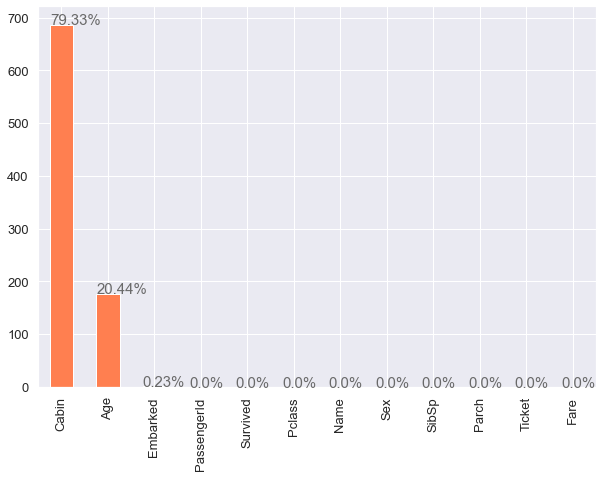

In [266]:
ax = train.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(),
            str(round((i.get_height()*100)/total, 2))+'%', fontsize=15,
                color='dimgrey')

##  Distribution of generation by sex:

<ul>
<li>G <= 10: Ages less than or equal to 10 years old</li>
<li>G 10: Ages between 11 and 20 years old</li>
<li>G 20: Ages between 21 and 30 years old</li>
<li>G 30: Ages between 31 and 40 years old</li>
<li>G 40: ages between 41 and 50 years old</li>
<li>G 50: Ages between 51 and 60 years old</li>
<li>G >= 61: ages over or equal to 61 years old</li>
</ul>

In [267]:
def generation(sex):
    list_G = []
    gL10 = train[train['Sex'] == sex][train['Age'] <=10]
    list_G.append(len(gL10))
    for n in np.arange(10, 60, 10):
        gn = train[train['Sex'] == sex][train['Age']>n][train['Age']<=n+10]
        list_G.append(len(gn))
    g_M61 = train[train['Sex'] == sex][train['Age'] >=61]
    list_G.append(len(g_M61))
    return list_G

In [268]:
def plot_generation():
    N = len(generation('female'))
    ind = np.arange(N)
    width = 0.35
    p1 = plt.bar(ind, generation('male'), width, color='blue')
    p2 = plt.bar(ind, generation('female'), width, bottom=generation('male'), color='pink')

    plt.xlabel('Generation')
    plt.ylabel('Number of person')
    plt.title('Distribution of generation: female and male')
    plt.xticks(ind, ('G <=10', 'G 10', 'G 20', 'G 30', 'G 40', 'G 50', 'G >=61'))
    plt.legend((p1[0], p2[0]), ('male', 'female'))

    plt.show()

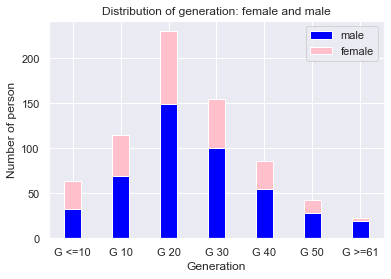

In [269]:
plot_generation()

In [270]:
def generation_survive_death(s):
    list_generation_survive_death = []
    g1s = train[train['Survived']==s][train['Age']<=10]
    list_generation_survive_death.append(len(g1s))
    for g in np.arange(10, 60, 10):
        gs = train[train['Survived']==s][train['Age']>g][train['Age']<=g+10]
        list_generation_survive_death.append(len(gs))
    g7s = train[train['Survived']==s][train['Age']>61]
    list_generation_survive_death.append(len(g7s))
    return list_generation_survive_death

In [271]:
def plot_generation_survive_death():
    N = len(generation_survive_death(1))
    ind = np.arange(N)
    width = 0.35
    p1 = plt.bar(ind, generation_survive_death(1), width, color='green')
    p2 = plt.bar(ind, generation_survive_death(0), width, bottom=generation_survive_death(1), color='red')

    plt.xlabel('Generation')
    plt.ylabel('Number of person')
    plt.title('Distribution of generation (survived and death)')
    plt.xticks(ind, ('G <=10', 'G 10', 'G 20', 'G 30', 'G 40', 'G 50', 'G >=61'))
    plt.legend((p1[0], p2[0]), ('survived', 'death'))

    plt.show()

## Distribution of generation (survived and death):

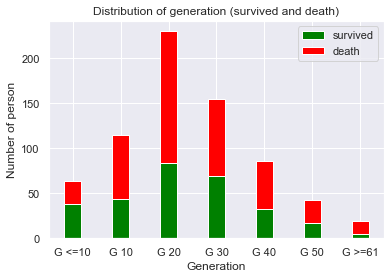

In [272]:
plot_generation_survive_death()

In [273]:
def sex_survive_death(sex, s):
    list_sex_survive_death = []
    g1s = train[train['Survived']==s][train['Sex']==sex][train['Age']<=10]
    list_sex_survive_death.append(len(g1s))
    for g in np.arange(10, 60, 10):
        gs = train[train['Survived']==s][train['Age']>g][train['Sex']==sex][train['Age']<=g+10]
        list_sex_survive_death.append(len(gs))
    g7s = train[train['Survived']==s][train['Sex']==sex][train['Age']>61]
    list_sex_survive_death.append(len(g7s))
    return list_sex_survive_death


In [274]:
def plot_sex_survive_death(sex):
    N = len(sex_survive_death(sex,1))
    ind = np.arange(N)
    width = 0.35
    p1 = plt.bar(ind, sex_survive_death(sex,1), width, color='green')
    p2 = plt.bar(ind, sex_survive_death(sex,0), width, bottom=sex_survive_death(sex,1), color='red')

    plt.xlabel('Generation')
    plt.ylabel('Number of person')
    plt.title('Distribution '+ sex + ' generation (survived and death)')
    plt.xticks(ind, ('G <=10', 'G 10', 'G 20', 'G 30', 'G 40', 'G 50', 'G >=61'))
    plt.legend((p1[0], p2[0]), ('survived', 'death'))

    plt.show()

## Distribution of generation by female (survived and death)

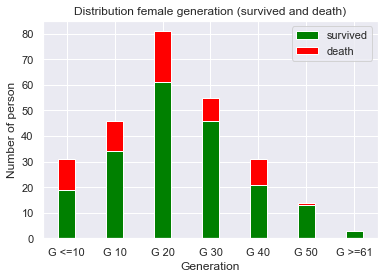

In [275]:
plot_sex_survive_death('female')

## Distribution of generation by male (survived and death)

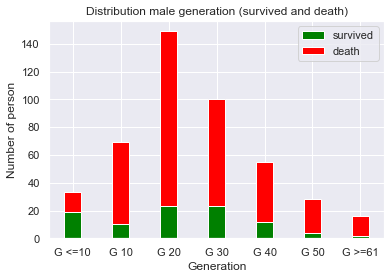

In [276]:
plot_sex_survive_death('male')

In [277]:
def bar_chart(name_file, column):
    survived = name_file[name_file['Survived']==1][column].value_counts()
    dead = name_file[name_file['Survived']==0][column].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5), width=0.25)

## Distribution of sex by survived and death

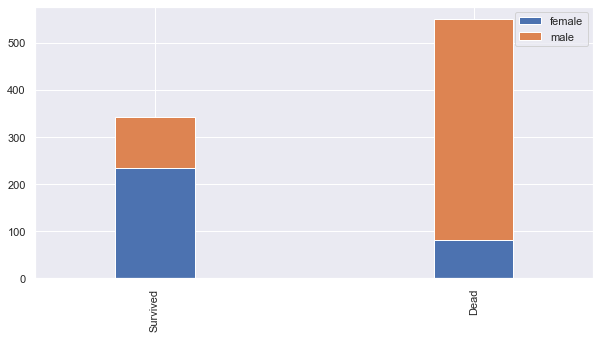

In [278]:
bar_chart(train,'Sex')

## Distribution of Pclass by survived and death

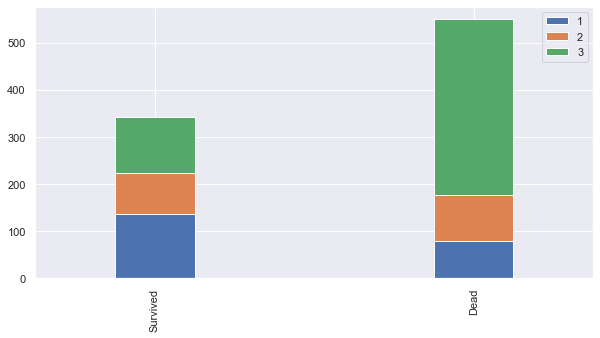

In [279]:
bar_chart(train,'Pclass')

## Distribution of SibSp by survived and death

SibSp(Sibling and Spouse): The number of family members of the passenger of type brother,
sister, half-brother, half-sister, husband, wife.

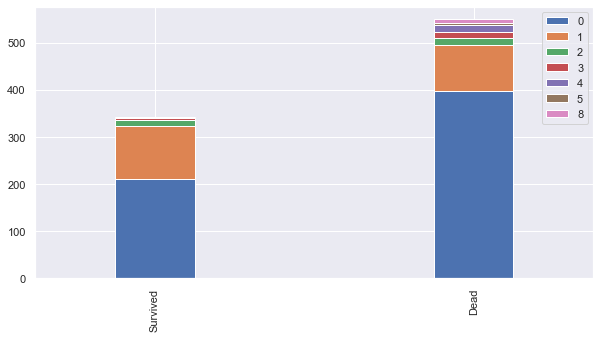

In [280]:
bar_chart(train, 'SibSp')

## Distribution of Parch by survived and death

Parch (Parent and Child): the number of family members of the passenger such as father,
mother, son, daughter, stepson, stepdaughter

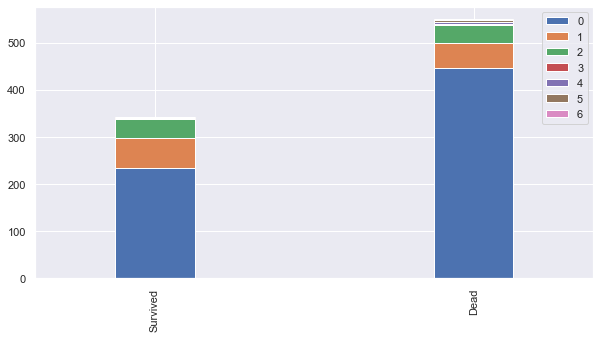

In [281]:
bar_chart(train, 'Parch')

## Distribution of Embarked by survived and death

Embarked: the passenger's port of embarkation, a categorical variable with 3 modalities:
<ul>
<li>"C" (Cherbourg)</li>
<li>"Q" (Queenstown)</li>
<li>"S" (Southampton)</li>
</ul>

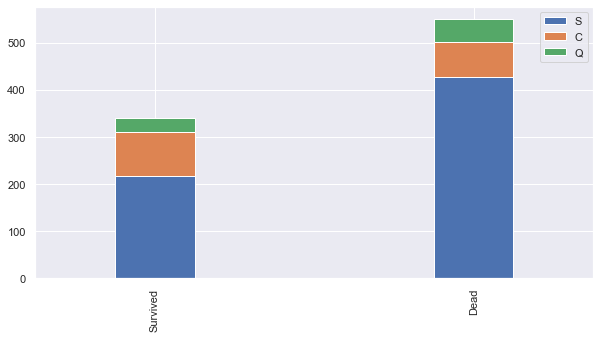

In [282]:
bar_chart(train, 'Embarked')

<AxesSubplot:xlabel='Pclass'>

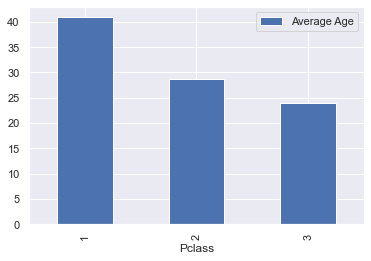

In [283]:
average_Age = test.groupby(['Pclass']).agg({ 'Age': ['mean']})
average_Age.columns = ['Average Age']
average_Age.plot(kind='bar')
